<a href="https://colab.research.google.com/github/iKatePy/Study_projects/blob/master/Project_ML(Financial%20data%20analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: классификация

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [40]:
df = pd.read_csv('bank_fin.csv', sep = ';')

In [41]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [42]:
print(df.isnull().sum())

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64


25 Пропущенных значений в поле balance 25

### Задание 2

In [43]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [44]:
print(df['job'].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


70 значений в признаке job заменены на unknown

### Задание 3

In [ ]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)

In [45]:
print(df['balance'].unique()[:20])

[' 2 343,00 $ ' ' 45,00 $ ' ' 1 270,00 $ ' ' 2 476,00 $ ' ' 184,00 $ '
 '0  $ ' ' 830,00 $ ' ' 545,00 $ ' ' 1,00 $ ' nan ' 100,00 $ '
 ' 309,00 $ ' ' 199,00 $ ' ' 460,00 $ ' ' 703,00 $ ' ' 3 837,00 $ '
 ' 611,00 $ ' '-8,00 $ ' ' 55,00 $ ' ' 168,00 $ ']


In [46]:
df['balance'] = df['balance'].astype(str).str.replace(r'[^\d.-]', '', regex=True)
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')

In [47]:
print(df['balance'].unique()[:20])

[ 2.343e+05  4.500e+03  1.270e+05  2.476e+05  1.840e+04  0.000e+00
  8.300e+04  5.450e+04  1.000e+02        nan  1.000e+04  3.090e+04
  1.990e+04  4.600e+04  7.030e+04  3.837e+05  6.110e+04 -8.000e+02
  5.500e+03  1.680e+04]


### Задание 4

In [48]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
median_balance = df['balance'].median()
df['balance'] = df['balance'].fillna(median_balance)

print(f"Количество пропусков после обработки: {df['balance'].isna().sum()}")
print(f"Тип данных столбца: {df['balance'].dtype}")

Количество пропусков после обработки: 0
Тип данных столбца: float64


### Задание 5

In [ ]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код

In [49]:
# Для каждого категориального признака находим моду (самое частое значение)
mode_job = df['job'].mode()[0]
mode_education = df['education'].mode()[0]

# Заменяем пропуски (если они есть) модальными значениями
df['job'] = df['job'].fillna(mode_job)
df['education'] = df['education'].fillna(mode_education)

# Заменим unknown на моду
df['job'] = df['job'].replace('unknown', mode_job)
df['education'] = df['education'].replace('unknown', mode_education)

print(f"Пропуски в 'job': {df['job'].isna().sum()}")
print(f"Пропуски в 'education': {df['education'].isna().sum()}")

Пропуски в 'job': 0
Пропуски в 'education': 0


### Задание 6

In [ ]:
# удалите все выбросы для признака balance
# ваш код

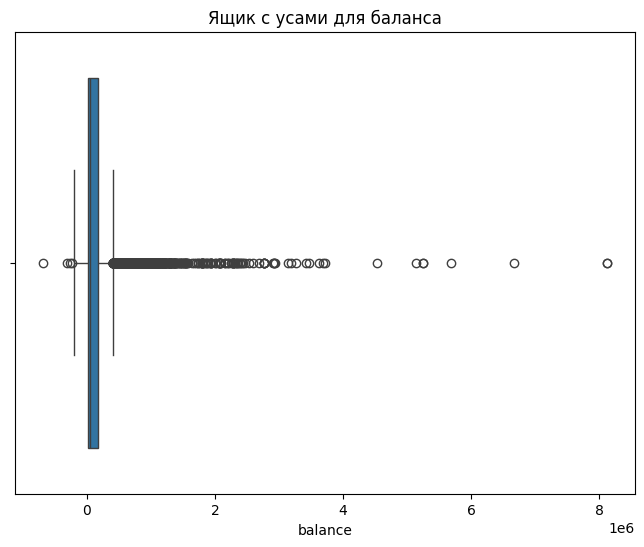

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['balance'].dropna())
plt.title('Ящик с усами для баланса')
plt.show()


Статистики после обработки:
count     10647.000000
mean     102045.158261
std      134883.324198
min     -305800.000000
25%       10800.000000
50%       49700.000000
75%      143900.000000
max      642200.000000
Name: balance, dtype: float64


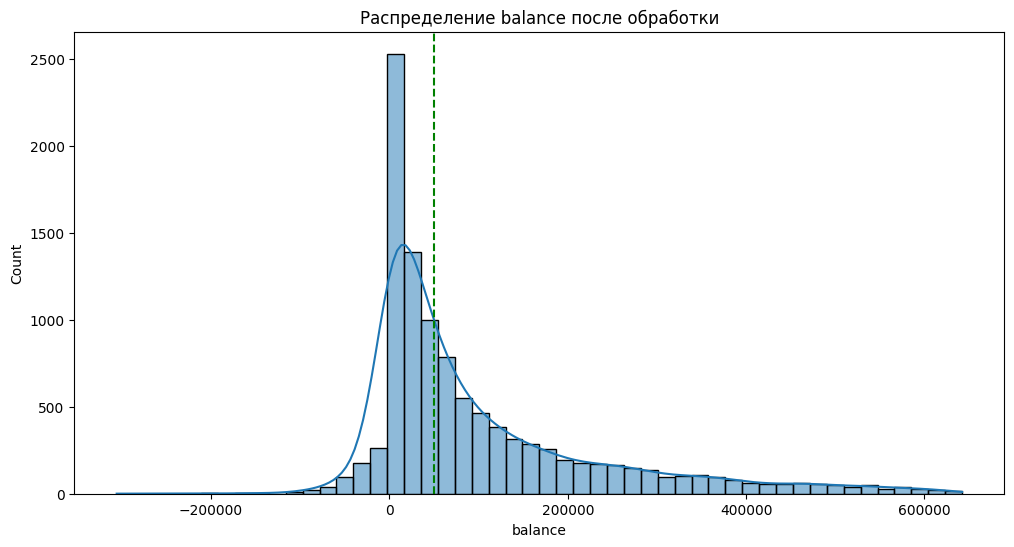

In [51]:
# Посмотрим межквартильный размах
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[(df['balance'] >= Q1 - 3*IQR) & (df['balance'] <= Q3 + 3*IQR)]  # Границы

# Удаляем всё, что выше разумного порога (например, 99-й перцентиль)
upper_threshold = df['balance'].quantile(0.99)
df_clean = df_clean[df_clean['balance'] <= upper_threshold]

# Проверка результата
print("\nСтатистики после обработки:")
print(df_clean['balance'].describe())

plt.figure(figsize=(12,6))
sns.histplot(df_clean['balance'], bins=50, kde=True)
plt.axvline(x=df_clean['balance'].median(), color='g', linestyle='--')
plt.title('Распределение balance после обработки')
plt.show()


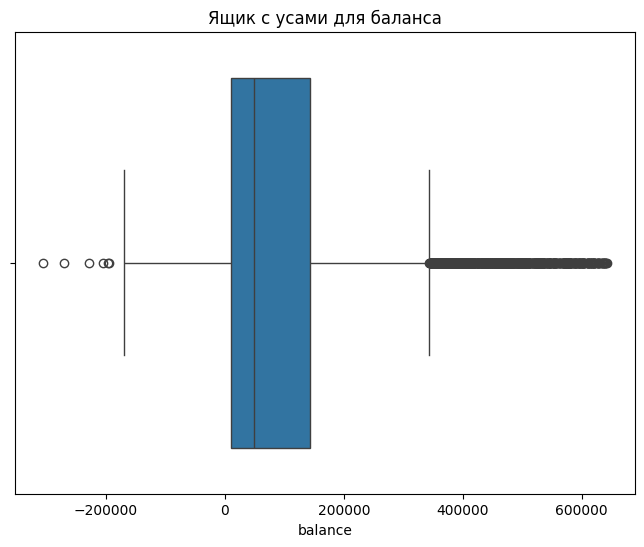

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['balance'].dropna())
plt.title('Ящик с усами для баланса')
plt.show()

## Часть 2:  Разведывательный анализ

### Задание 1

In [ ]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код

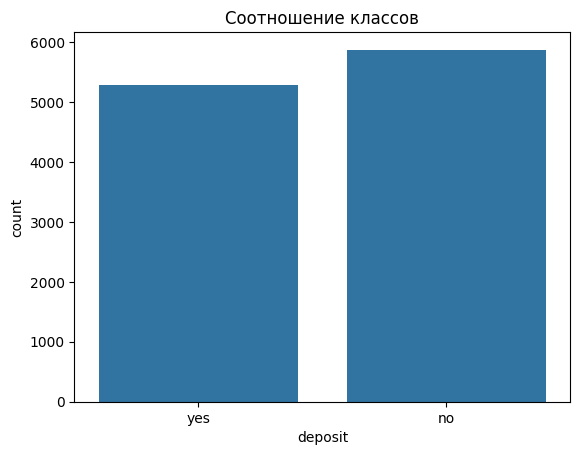

In [53]:
sns.countplot(x='deposit', data=df)
plt.title('Соотношение классов')
plt.show()

### Задания 2 и 3

In [ ]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код

In [54]:
print(df.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  1.116200e+04  11162.000000  11162.000000  11162.000000   
mean      41.231948  1.526936e+05     15.658036    371.993818      2.508421   
std       11.913369  3.224830e+05      8.420740    347.128386      2.722077   
min       18.000000 -6.847000e+05      1.000000      2.000000      1.000000   
25%       32.000000  1.230000e+04      8.000000    138.000000      1.000000   
50%       39.000000  5.500000e+04     15.000000    255.000000      2.000000   
75%       49.000000  1.699000e+05     22.000000    496.000000      3.000000   
max       95.000000  8.120400e+06     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


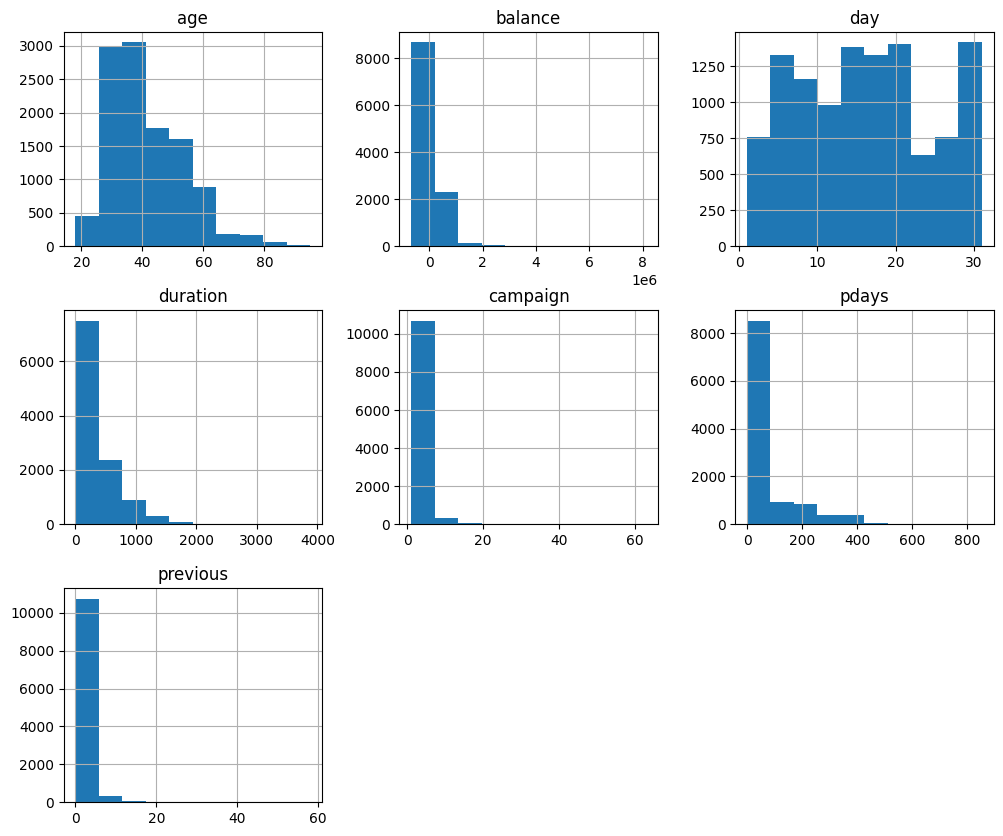

In [55]:
# Визуализация распределений
df.hist(figsize=(12, 10))
plt.show()

Интерпретация результата:

Средний возраст 40.7 лет, большинство клиентов в диапазоне 32 - 48 лет, минимальный возраст 18 лет, максимальный - 95. Аудитория представляет все возрастные группы, но фокуч на клиентах среднего возраста

Средний баланс 61 тыс., но высокая дисперсия (стандартное отклонение 69.6 тыс.). Выбросы: Минимум -63.9 тыс. (возможны кредитные счета или ошибки), максимум 264.6 тыс. (крупные вложения). Медиана: 38.1 тыс. — 50% клиентов имеют баланс до 38 тыс., что указывает на асимметрию (большинство — малые/средние счета).



Распределение: Средний день контакта — 15-й (середина месяца), диапазон 1–31. Контакты равномерно распределены в течение месяца, без явных пиков.

Средняя длительность: 367 секунд (6 минут), но сильный разброс (от 2 сек до 3881 сек — 65 минут). Медиана: 251 секунда (4.2 минуты) — у 50% клиентов контакт длится до 4 минут.  Есть клиенты с очень долгим взаимодействием (возможно, сложные случаи или ошибки в данных).

Среднее: 2.54 контакта на клиента, но максимум — 43 (аномально высокое значение). Медиана: 2 контакта — большинство клиентов контактируют 1–3 раза. Риск: Клиенты с числом контактов >10 могут быть перегружены (спам/навязчивые предложения).



pdays (дней с последнего контакта): У большинства клиентов не было предыдущих контактов (медиана и 75%-квартиль = -1). Максимум 854 дня: Некоторые клиенты контактировали более 2 лет назад (редкие случаи).

previous (число предыдущих контактов): Среднее: 0.81, но медиана = 0 — у большинства клиентов не было контактов. Максимум 58: Возможны ошибки или агрессивный маркетинг.


Рекомендации:
Очистка данных: возможно, удалить записи с balance < 0 и campaign > 10. Анализ долгих звонков: Выделить причины высокой длительности (duration). Фокус на вовлеченность: Увеличить число повторных контактов (previous), избегая спама.


### Задания 4 и 5

In [ ]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты

In [56]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2636,6351,5973,10994,5881,9702,8042,2824,8326,5873


Представлены 11 уникальных категорий,     доминирует management (2089 записей). Большинство клиентов относятся к управленческим профессиям, что может указывать на целевую аудиторию банка.

3 категории семейного полодения: married (5190 записей), single, divorced (остаток). Преобладают клиенты в браке, что требует маркетинговых стратегий для семейных финансовых продуктов.

3 уровня образования: secondary имеет 5098 записей, Большинство клиентов имеют среднее образование, что может коррелировать с продуктами среднего ценового сегмента.

Default 2 категории: no (9091 записей), yes. Дефолты редки (<2%), что говорит о низком кредитном риске клиентской базы.

Housing 2 категории: no (4762 записи), yes. Примерно равное распределение между клиентами с ипотекой и без нее.

loan 2 категории: no (7931 записей), yes. Только 14% клиентов имеют кредиты, что может указывать на консервативную кредитную политику.

contact 3 канала: cellular (6645 записей), unknown , telephone. Мобильные звонки — основной канал взаимодействия, что требует оптимизации под мобильные устройства.

month 12 месяцев: пик в may (2448 записей). Активность контактов выше весной (май), что может быть связано с сезонными кампаниями.

poutcome 4 исхода: unknown (6942 записи), success , failure. Большинство предыдущих контактов не имели результата (75%), что требует пересмотра маркетинговых скриптов.

deposit 2 категории: no (5049 записей), yes. Распределение близко к равномерному, что подходит для бинарной классификации без дисбаланса.

Проблемы: высокий процент unknown в poutcome требует анализа причин (например, плохое качество данных или низкая вовлеченность). Преобладание management и married указывает на необходимость персонализированных предложений для этих групп. Малая доля клиентов с loan=yes может сигнализировать о недоверии или высоких процентных ставках.


job:
job
management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: count, dtype: int64


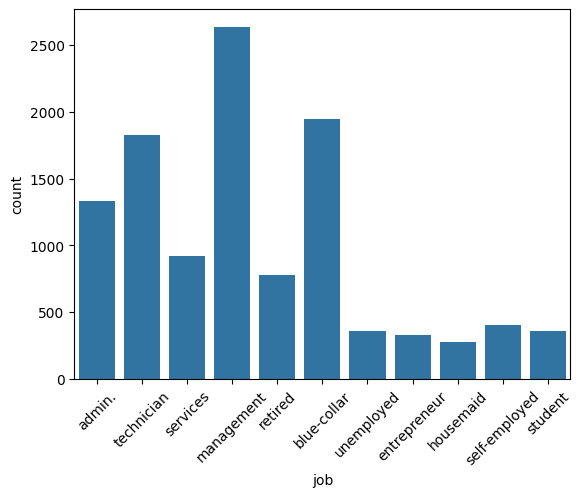


marital:
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64


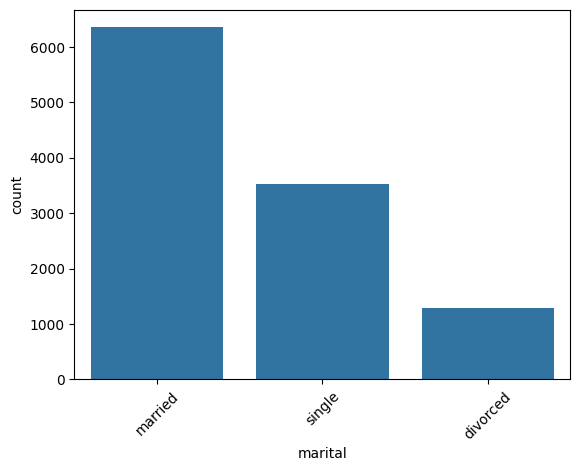


education:
education
secondary    5973
tertiary     3689
primary      1500
Name: count, dtype: int64


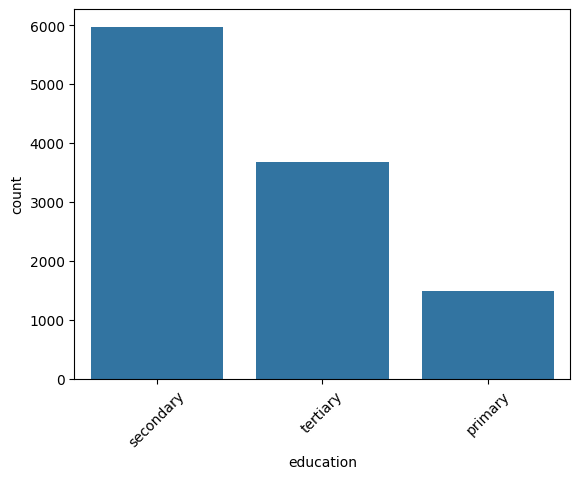


default:
default
no     10994
yes      168
Name: count, dtype: int64


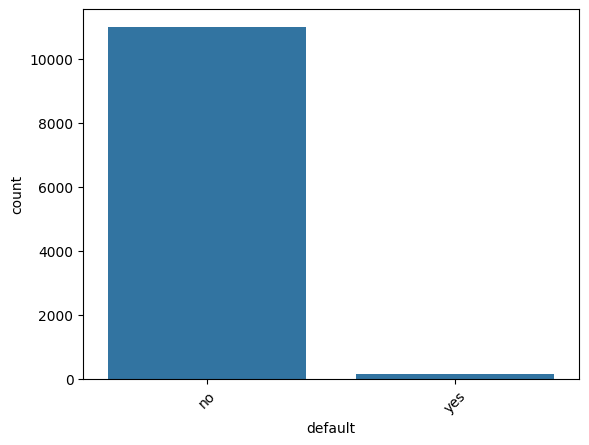


housing:
housing
no     5881
yes    5281
Name: count, dtype: int64


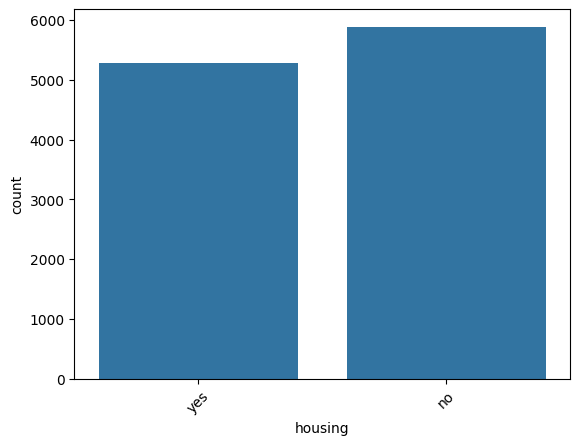


loan:
loan
no     9702
yes    1460
Name: count, dtype: int64


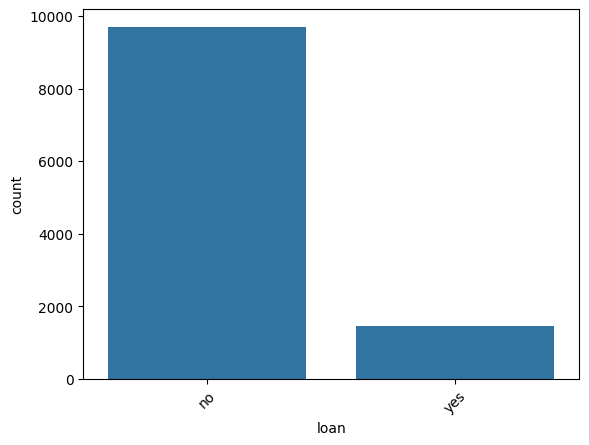


contact:
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64


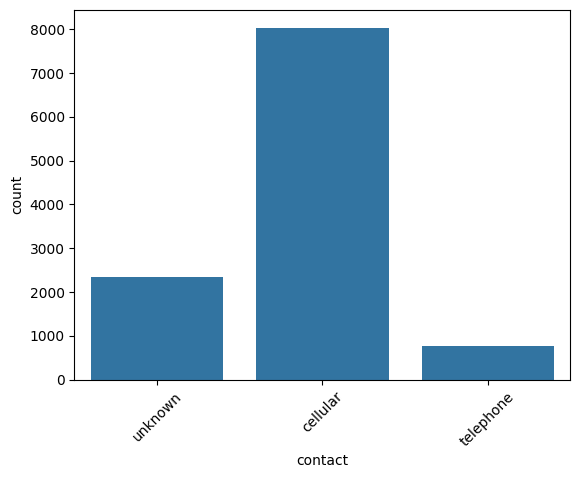


month:
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64


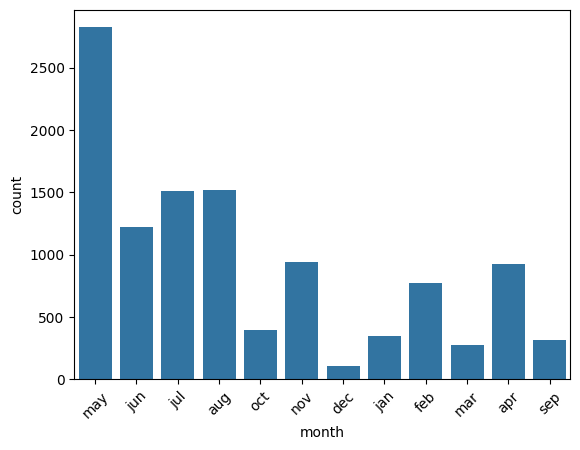


poutcome:
poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64


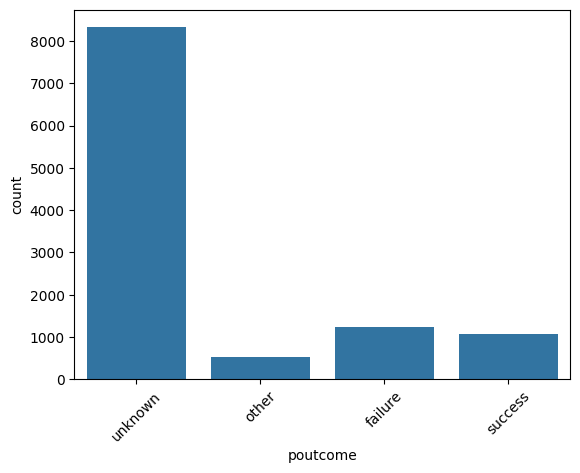

In [57]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.show()

### Задание 6

In [ ]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код

In [58]:
print(df.groupby('poutcome')['deposit'].value_counts(normalize=True))

poutcome  deposit
failure   yes        0.503257
          no         0.496743
other     yes        0.571695
          no         0.428305
success   yes        0.913165
          no         0.086835
unknown   no         0.593322
          yes        0.406678
Name: proportion, dtype: float64


Успех в текущей кампании превалирует над неудачами для следующих статусов предыдущей кампании: success (крайне сильное преобладание), other (небольшое преобладание). Клиенты с успешными предыдущими контактами почти гарантированно открывают депозиты.

### Задание 7

In [ ]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код

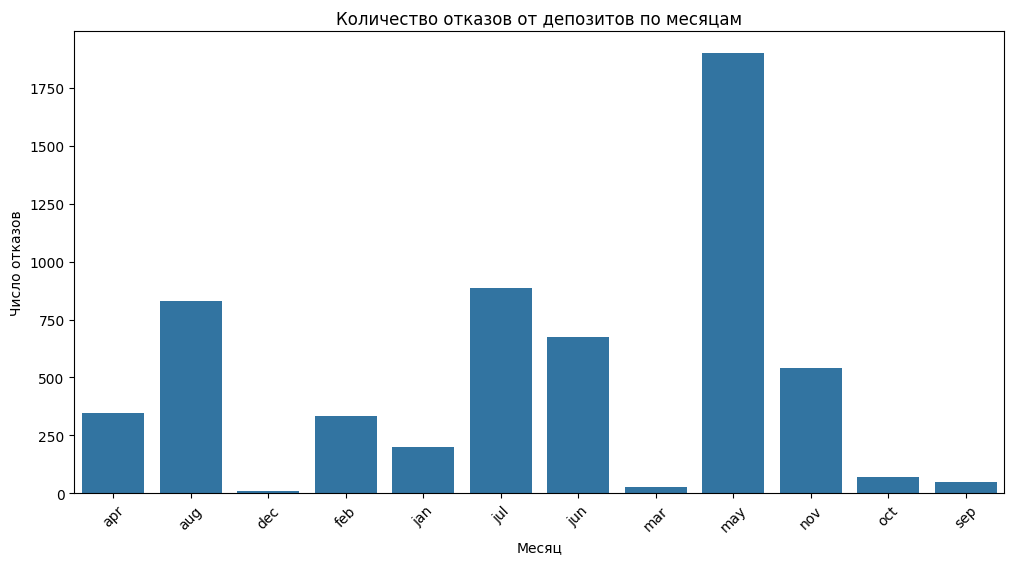

In [59]:
refusals = df[df['deposit'] == 'no']

# Подсчет отказов по месяцам
monthly_refusals = refusals['month'].value_counts().sort_index()

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_refusals.index, y=monthly_refusals.values)
plt.title('Количество отказов от депозитов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Число отказов')
plt.xticks(rotation=45)
plt.show()

In [60]:
print(df[df['deposit'] == 'no']['month'].value_counts().idxmax())

may


### Задание 8

In [ ]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения

In [61]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 100], labels=['<30', '30-45', '45-60', '60+'])
print(df.groupby('age_group')['deposit'].value_counts(normalize=True))

age_group  deposit
<30        yes        0.570503
           no         0.429497
30-45      no         0.575335
           yes        0.424665
45-60      no         0.570814
           yes        0.429186
60+        yes        0.821604
           no         0.178396
Name: proportion, dtype: float64


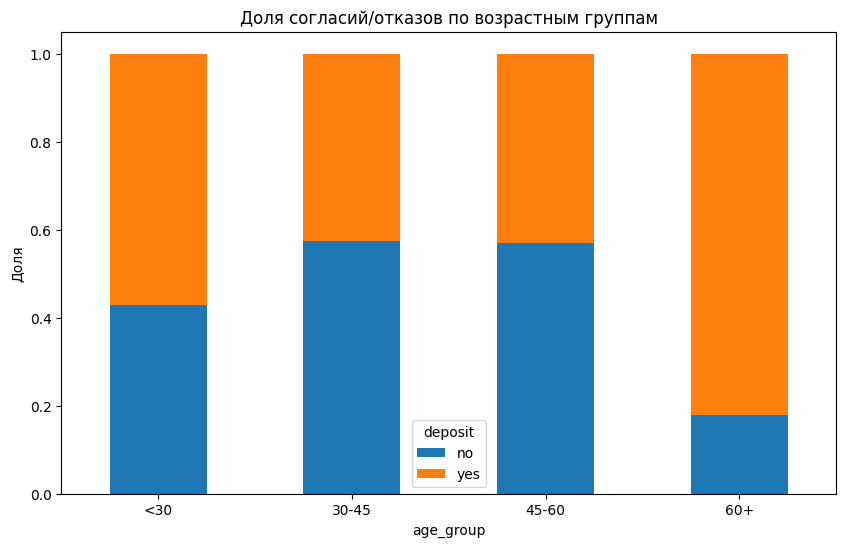

In [62]:
# Данные для графика
age_deposit = df.groupby('age_group')['deposit'].value_counts(normalize=True).unstack()

# Построение
age_deposit.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Доля согласий/отказов по возрастным группам')
plt.ylabel('Доля')
plt.xticks(rotation=0)
plt.show()


### Задания 9 и 10

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости

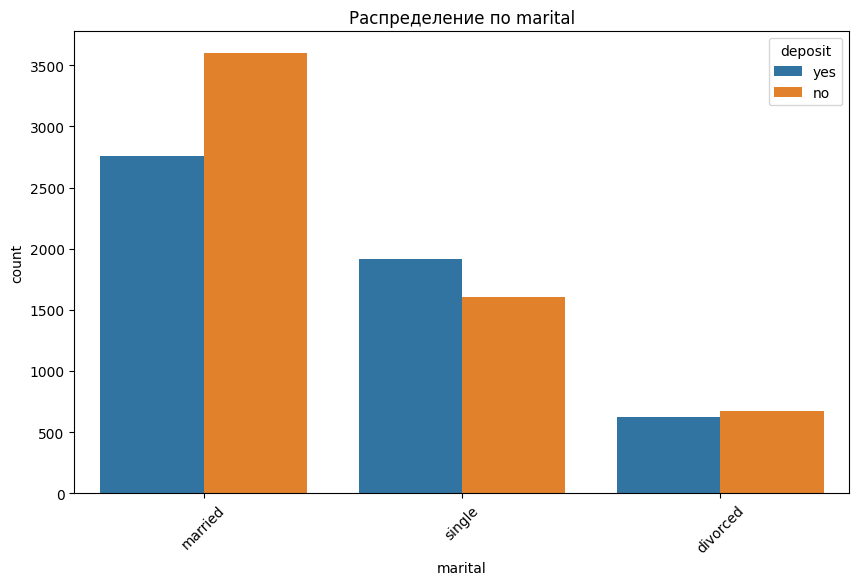

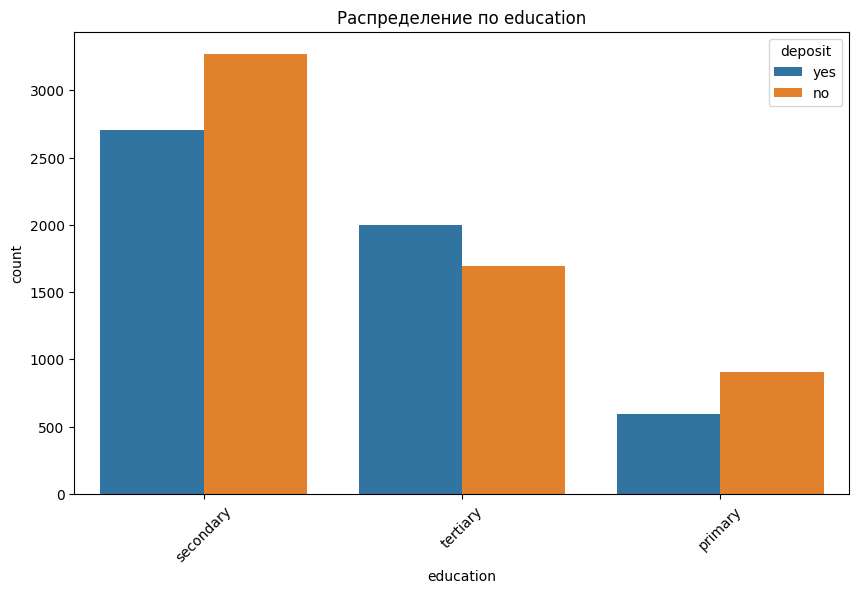

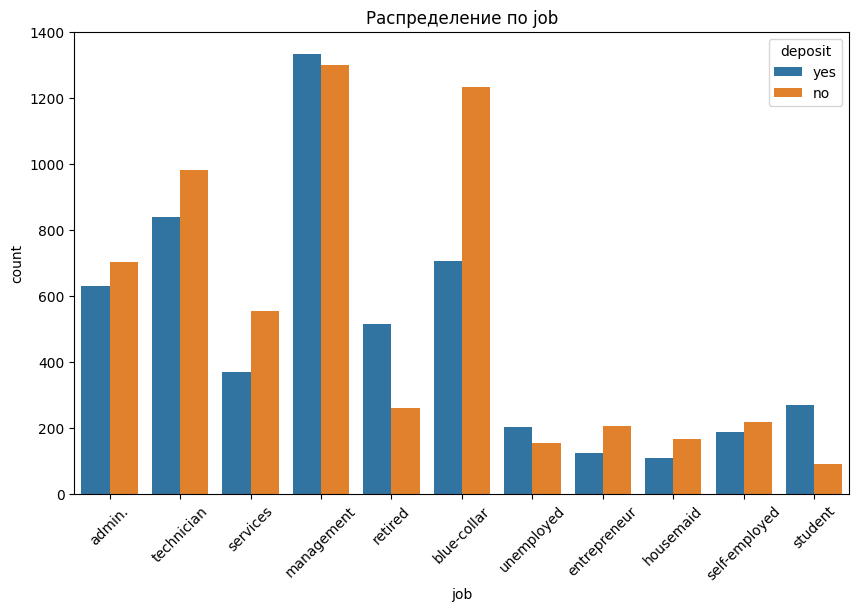

In [63]:
for col in ['marital', 'education', 'job']:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, hue='deposit', data=df)
    plt.title(f'Распределение по {col}')
    plt.xticks(rotation=45)
    plt.show()

### Задание 11

In [ ]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

In [64]:
# Сводная таблица с абсолютными значениями
cross_abs = pd.crosstab(
    index=[df['education'], df['marital']],
    columns=df['deposit']
)

# Добавление столбца с общим числом людей в группе
cross_abs['total'] = cross_abs.sum(axis=1)

# Сортировка по убыванию
cross_abs_sorted = cross_abs.sort_values('total', ascending=False)
print(cross_abs_sorted[['total']])


deposit             total
education marital        
secondary married    3409
          single     1861
tertiary  married    1843
          single     1460
primary   married    1099
secondary divorced    703
tertiary  divorced    386
primary   divorced    204
          single      197


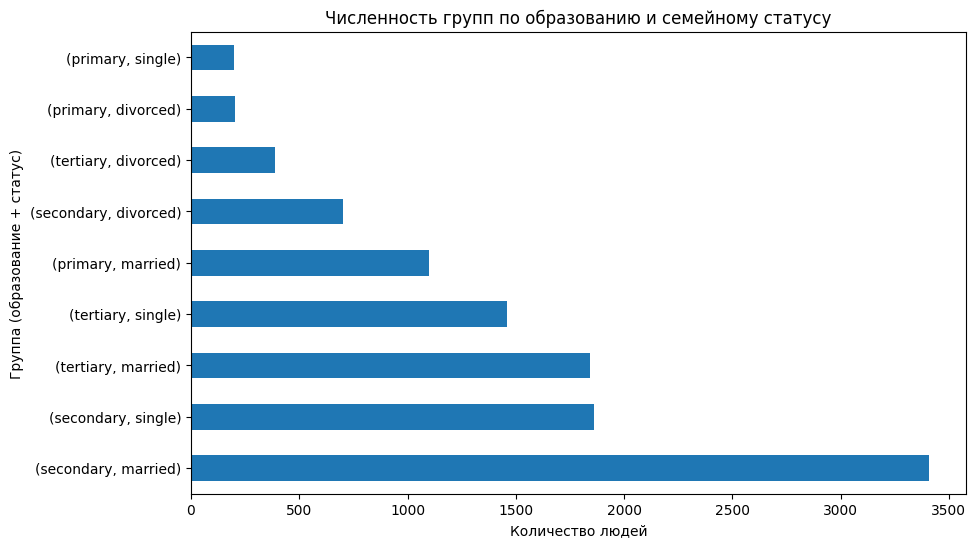

In [65]:
# Данные из cross_abs_sorted
cross_abs_sorted['total'].plot(kind='barh', figsize=(10, 6))
plt.title('Численность групп по образованию и семейному статусу')
plt.xlabel('Количество людей')
plt.ylabel('Группа (образование + статус)')
plt.show()

## Часть 3: преобразование данных

### Задание 1

In [ ]:
# преобразуйте уровни образования

In [66]:
education_map = {'primary': 1, 'secondary': 2, 'tertiary': 3}
df['education'] = df['education'].map(education_map)

### Задания 2 и 3

In [ ]:
# преобразуйте бинарные переменные в представление из нулей и единиц

In [67]:
binary_cols = ['default', 'housing', 'loan', 'deposit']
for col in binary_cols:
    df[col] = df[col].map({'no': 0, 'yes': 1})

### Задание 4

In [ ]:
# создайте дамми-переменные

In [68]:
df = pd.get_dummies(df, columns=['job', 'marital', 'contact', 'month', 'poutcome'])

In [69]:
print(df.dtypes)

age                     int64
education               int64
default                 int64
balance               float64
housing                 int64
loan                    int64
day                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
deposit                 int64
age_group            category
job_admin.               bool
job_blue-collar          bool
job_entrepreneur         bool
job_housemaid            bool
job_management           bool
job_retired              bool
job_self-employed        bool
job_services             bool
job_student              bool
job_technician           bool
job_unemployed           bool
marital_divorced         bool
marital_married          bool
marital_single           bool
contact_cellular         bool
contact_telephone        bool
contact_unknown          bool
month_apr                bool
month_aug                bool
month_dec                bool
month_feb 

### Задания 5 и 6

In [ ]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

Матрица отображалась некорректно, нужно убедиться, что все данные в нужном формате

In [70]:
# Выбор всех нечисловых столбцов
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Преобразование в dummy-переменные (уже выполнено ранее)
if not cat_cols.empty:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=False)
    print("Создано dummy-переменных:", len(df.columns) - len(cat_cols))

# Для всех бинарных столбцов
for col in df.columns:
    if df[col].nunique() == 2:
        df[col] = df[col].astype('uint8')

# Для остальных числовых данных
num_cols = df.select_dtypes(include=['int64', 'float64', 'uint8']).columns
print("Числовые столбцы:", num_cols.tolist())

# Проверка пустоты через .empty
if num_cols.empty:
    # ручное указание столбцов
    manual_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
    num_cols = [col for col in manual_cols if col in df.columns]

print("Доступные столбцы:", num_cols)
if len(num_cols) == 0:  # Изменено условие проверки
    raise ValueError("Не удалось найти подходящие столбцы. Проверьте исходные данные.")
else:
    corr_matrix = df[num_cols].corr()  # Теперь корректно работает
    print("Размер матрицы:", corr_matrix.shape)


Создано dummy-переменных: 48
Числовые столбцы: ['age', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'deposit', 'age_group_<30', 'age_group_30-45', 'age_group_45-60', 'age_group_60+', 'job_admin._False', 'job_admin._True', 'job_blue-collar_False', 'job_blue-collar_True', 'job_entrepreneur_False', 'job_entrepreneur_True', 'job_housemaid_False', 'job_housemaid_True', 'job_management_False', 'job_management_True', 'job_retired_False', 'job_retired_True', 'job_self-employed_False', 'job_self-employed_True', 'job_services_False', 'job_services_True', 'job_student_False', 'job_student_True', 'job_technician_False', 'job_technician_True', 'job_unemployed_False', 'job_unemployed_True', 'marital_divorced_False', 'marital_divorced_True', 'marital_married_False', 'marital_married_True', 'marital_single_False', 'marital_single_True', 'contact_cellular_False', 'contact_cellular_True', 'contact_telephone_False', 'contact_telephone_True', 'c

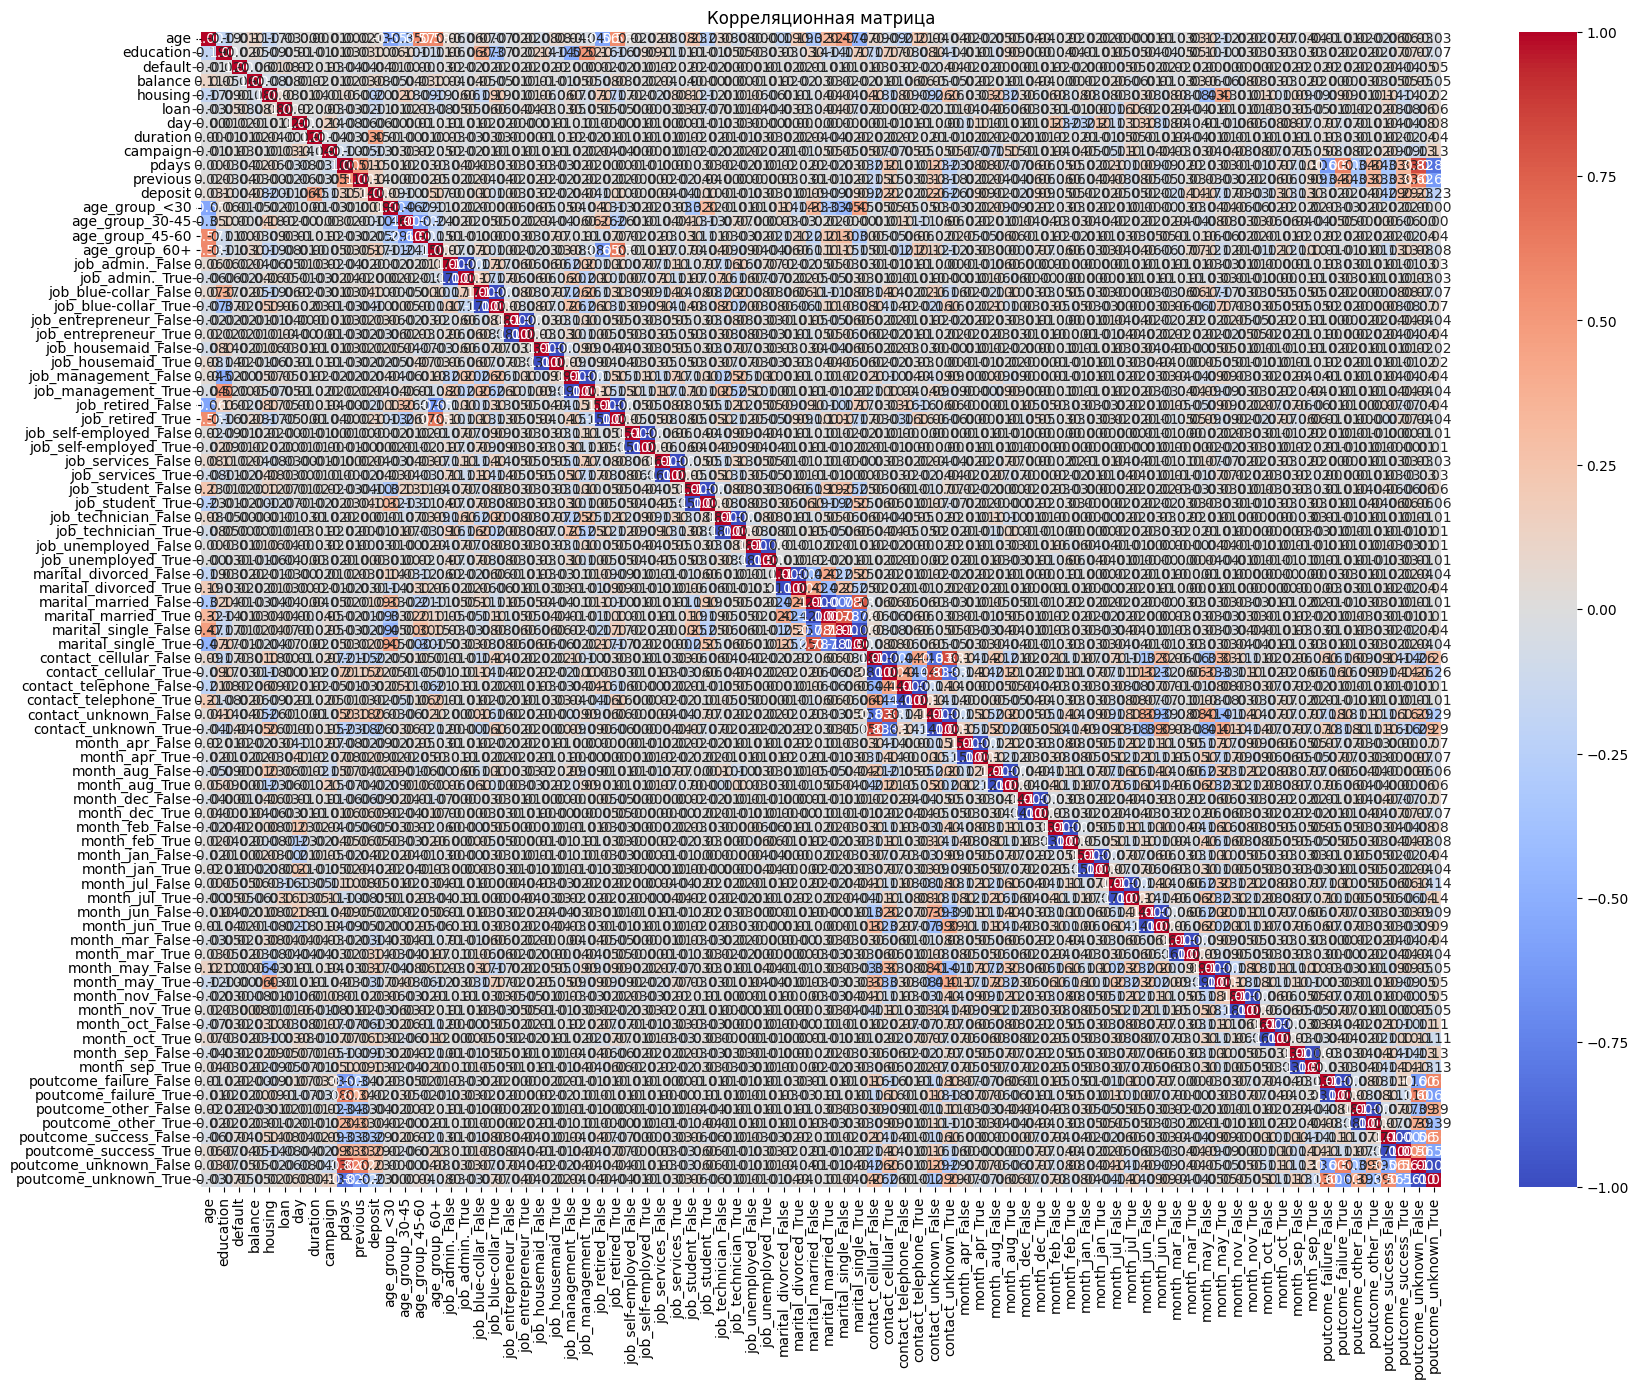

Высокие корреляции (>0.75):
 pdays                    poutcome_unknown_False     0.823928
                         poutcome_unknown_True     -0.823928
job_blue-collar_False    job_blue-collar_True      -1.000000
job_blue-collar_True     job_blue-collar_False     -1.000000
job_housemaid_False      job_housemaid_True        -1.000000
job_housemaid_True       job_housemaid_False       -1.000000
job_management_False     job_management_True       -1.000000
job_management_True      job_management_False      -1.000000
job_self-employed_False  job_self-employed_True    -1.000000
job_self-employed_True   job_self-employed_False   -1.000000
job_services_False       job_services_True         -1.000000
job_services_True        job_services_False        -1.000000
job_technician_False     job_technician_True       -1.000000
job_technician_True      job_technician_False      -1.000000
job_unemployed_False     job_unemployed_True       -1.000000
job_unemployed_True      job_unemployed_False      -1.00

In [71]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Корреляционная матрица")
plt.show()

# Поиск высоких корреляций
high_corr = (corr_matrix.abs() > 0.75) & (corr_matrix.abs() < 1.0)
print("Высокие корреляции (>0.75):\n", corr_matrix[high_corr].stack().dropna())


Данные содержат критическую мультиколлинеарность, в основном из-за one-hot кодировки. Искусственные корреляции между dummy-переменными (-1 и +1), так как они взаимозависимы (например, job_blue-collar_True и job_blue-collar_False всегда дают в сумме 1).После удаления избыточных бинарных переменных и обработки смыслово связанных пар (pdays/poutcome) проблема будет решена.

### Задания 7 и 8

In [ ]:
# рассчитайте необходимые показатели

In [72]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

### Задание 9

In [ ]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

In [73]:
selector = SelectKBest(f_classif, k=15)
X_new = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
print(selected_features)

Index(['housing', 'duration', 'pdays', 'age_group_60+',
       'contact_cellular_False', 'contact_cellular_True',
       'contact_unknown_False', 'contact_unknown_True', 'month_mar_True',
       'month_may_False', 'month_may_True', 'poutcome_success_False',
       'poutcome_success_True', 'poutcome_unknown_False',
       'poutcome_unknown_True'],
      dtype='object')


### Задание 10

In [ ]:
# нормализуйте данные с помощью minmaxsxaler

In [74]:
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [ ]:
# обучите логистическую регрессию и рассчитайте метрики качества

In [75]:
log_reg = linear_model.LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1938
           1       0.84      0.79      0.82      1746

    accuracy                           0.83      3684
   macro avg       0.83      0.83      0.83      3684
weighted avg       0.83      0.83      0.83      3684



### Задания 2,3,4

In [ ]:
# обучите решающие деревья, настройте максимальную глубину

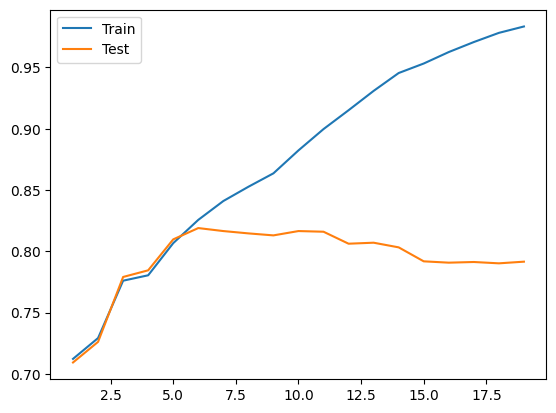

In [76]:
depths = range(1, 20)
train_scores = []
test_scores = []
for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train_scaled, y_train)
    train_scores.append(clf.score(X_train_scaled, y_train))
    test_scores.append(clf.score(X_test_scaled, y_test))

plt.plot(depths, train_scores, label='Train')
plt.plot(depths, test_scores, label='Test')
plt.legend()
plt.show()

### Задание 5

In [ ]:
# подберите оптимальные параметры с помощью gridsearch

In [77]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': range(1, 20),
          'min_samples_split': range(2, 10),
          'min_samples_leaf': range(1, 5)}
grid = GridSearchCV(tree.DecisionTreeClassifier(), params, cv=5)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 8}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [ ]:
# обучите на ваших данных случайный лес

In [78]:
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1938
           1       0.83      0.88      0.85      1746

    accuracy                           0.86      3684
   macro avg       0.86      0.86      0.86      3684
weighted avg       0.86      0.86      0.86      3684



### Задания 2 и 3

In [ ]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

In [79]:
gb = ensemble.GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
y_pred = gb.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1938
           1       0.83      0.86      0.84      1746

    accuracy                           0.85      3684
   macro avg       0.85      0.85      0.85      3684
weighted avg       0.85      0.85      0.85      3684



### Задание 4

In [ ]:
# объедините уже известные вам алгоритмы с помощью стекинга

In [80]:
from sklearn.ensemble import StackingClassifier
# метод опорных векторов
from sklearn.svm import SVC
estimators = [
    ('rf', ensemble.RandomForestClassifier()),
    ('gb', ensemble.GradientBoostingClassifier()),
    ('svc', SVC())
]
stack = StackingClassifier(estimators=estimators, final_estimator=linear_model.LogisticRegression())
stack.fit(X_train_scaled, y_train)
y_pred = stack.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1938
           1       0.84      0.87      0.85      1746

    accuracy                           0.86      3684
   macro avg       0.86      0.86      0.86      3684
weighted avg       0.86      0.86      0.86      3684



### Задание 5

In [ ]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

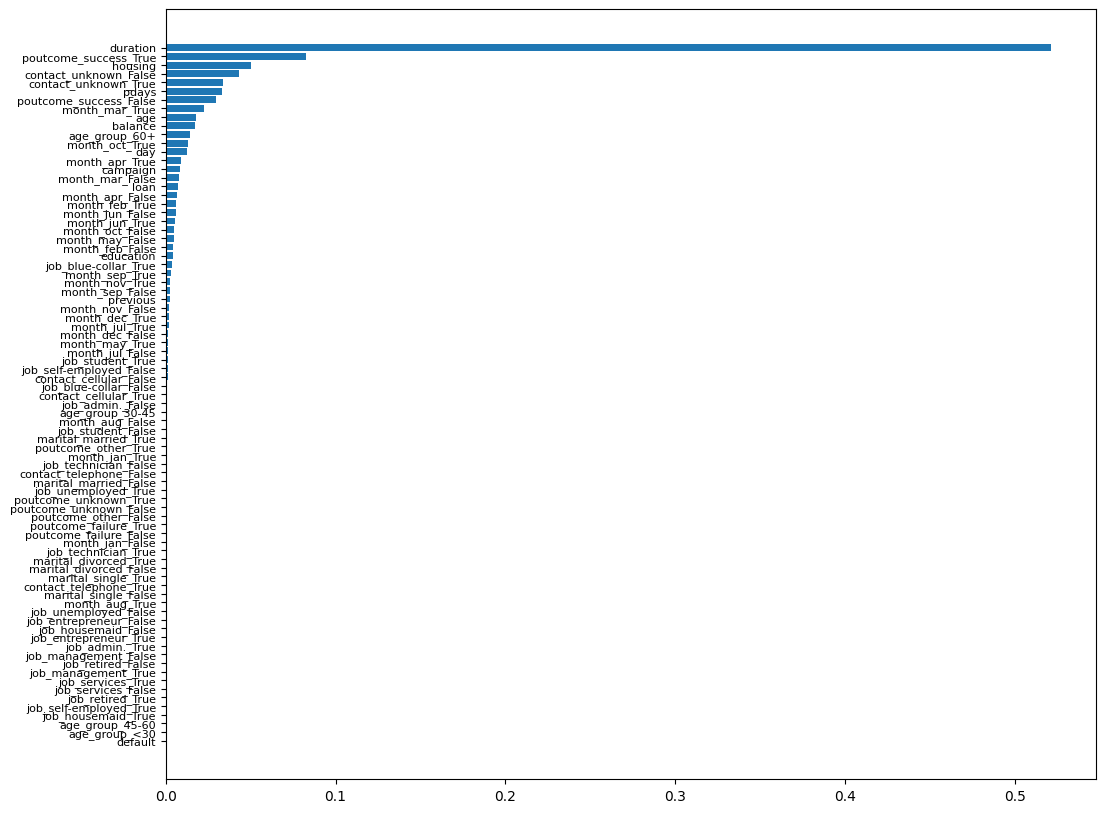

In [85]:
feature_importance = gb.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(12, 10))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx],fontsize=8)
plt.show()

### Задания 6,7,8

In [ ]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna

In [86]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.4 MB/s eta 0:00:00


In [87]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
    }
    model = ensemble.GradientBoostingClassifier(**params)
    model.fit(X_train_scaled, y_train)
    return model.score(X_test_scaled, y_test)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(study.best_params)

[I 2025-04-27 08:37:26,485] A new study created in memory with name: no-name-86580f21-d87c-4b83-a9c9-5d534b04cf82
[I 2025-04-27 08:37:58,006] Trial 0 finished with value: 0.8629207383279045 and parameters: {'n_estimators': 199, 'max_depth': 10, 'learning_rate': 0.2644232221151968}. Best is trial 0 with value: 0.8629207383279045.
[I 2025-04-27 08:37:59,608] Trial 1 finished with value: 0.8469055374592834 and parameters: {'n_estimators': 74, 'max_depth': 3, 'learning_rate': 0.14947493712440862}. Best is trial 0 with value: 0.8629207383279045.
[I 2025-04-27 08:38:02,498] Trial 2 finished with value: 0.8545059717698155 and parameters: {'n_estimators': 135, 'max_depth': 3, 'learning_rate': 0.09917420910069173}. Best is trial 0 with value: 0.8629207383279045.
[I 2025-04-27 08:38:15,142] Trial 3 finished with value: 0.8539630836047775 and parameters: {'n_estimators': 194, 'max_depth': 8, 'learning_rate': 0.1561948731350891}. Best is trial 0 with value: 0.8629207383279045.
[I 2025-04-27 08:38:

{'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.19371716553205293}


Применим оптимальные параметры и визуализируем как происходила оптимизация

In [88]:
# финальная модель с оптимальными параметрами
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Создание модели с лучшими параметрами
best_model = ensemble.GradientBoostingClassifier(**study.best_params)
best_model.fit(X_train_scaled, y_train)

# Предсказание и оценка
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1938
           1       0.84      0.88      0.86      1746

    accuracy                           0.86      3684
   macro avg       0.86      0.86      0.86      3684
weighted avg       0.86      0.86      0.86      3684



In [92]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study).show()